In [ ]:
import seaborn as sns
import pandas as pd
sns.set_theme(style='darkgrid')

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/Fall 2022 Modeling and Simulation/WoodHoopoesDirectCalibration.csv'
woodhoopoe_data = pd.read_csv(filename, usecols = [0,1,4,6,7,8,9], header=0, 
                              names = ['run','survival-prob', 'foray-success', 
                                       'year', 'month', 'pop', 'vacancy-count'])

In [ ]:
woodhoopoe_data

,run,survival-prob,foray-success,year,month,pop,vacancy-count
0,3,0.95,0.052,1,0,100,0
1,1,0.95,0.050,1,0,100,0
2,3,0.95,0.052,1,1,97,1
3,1,0.95,0.050,1,1,100,0
4,1,0.95,0.050,1,2,100,0
...,...,...,...,...,...,...,...
148660,561,1.00,0.100,22,8,112,3
148661,561,1.00,0.100,22,9,112,2
148662,561,1.00,0.100,22,10,111,2
148663,561,1.00,0.100,22,11,109,3


In [ ]:
calibration_subdata = woodhoopoe_data[woodhoopoe_data['year'] > 2] # filter out years 1 and 2
calibration_subdata = calibration_subdata[calibration_subdata['month'] == 11] # only look at results from month 11

In [ ]:
calibration_subdata

,run,survival-prob,foray-success,year,month,pop,vacancy-count
96,1,0.95,0.050,3,11,116,6
104,3,0.95,0.052,3,11,119,7
115,4,0.95,0.053,3,11,107,8
130,1,0.95,0.050,4,11,108,6
139,3,0.95,0.052,4,11,121,7
...,...,...,...,...,...,...,...
148615,561,1.00,0.100,18,11,101,2
148627,561,1.00,0.100,19,11,102,4
148639,561,1.00,0.100,20,11,102,6
148651,561,1.00,0.100,21,11,105,3


In [ ]:
calibration_subdata['vacancy-rate'] = calibration_subdata['vacancy-count']/25
calibration_subdata

,run,survival-prob,foray-success,year,month,pop,vacancy-count,vacancy-rate
96,1,0.95,0.050,3,11,116,6,0.24
104,3,0.95,0.052,3,11,119,7,0.28
115,4,0.95,0.053,3,11,107,8,0.32
130,1,0.95,0.050,4,11,108,6,0.24
139,3,0.95,0.052,4,11,121,7,0.28
...,...,...,...,...,...,...,...,...
148615,561,1.00,0.100,18,11,101,2,0.08
148627,561,1.00,0.100,19,11,102,4,0.16
148639,561,1.00,0.100,20,11,102,6,0.24
148651,561,1.00,0.100,21,11,105,3,0.12


In [ ]:
calibration_subdata_by_run = calibration_subdata.groupby('run')
abundance_data = calibration_subdata_by_run['pop'].mean().to_frame(name = 'abundance')
abundance_data

,abundance
run,
1,138.15
2,155.15
3,143.15
4,146.85
5,120.55
...,...
557,121.45
558,118.50
559,121.15


In [ ]:
variation_data = calibration_subdata_by_run['pop'].std().to_frame(name = 'variation')
variation_data

,variation
run,
1,17.741640
2,14.102165
3,15.400871
4,18.782060
5,15.052452
...,...
557,11.852048
558,8.075303
559,8.797577


In [ ]:
vacancy_data = calibration_subdata_by_run['vacancy-rate'].mean().to_frame(name='vacancy')
vacancy_data

,vacancy
run,
1,0.154
2,0.078
3,0.116
4,0.108
5,0.280
...,...
557,0.084
558,0.078
559,0.070


In [ ]:
surv_prob_vals = calibration_subdata_by_run['survival-prob'].mean().to_frame(name='survival-prob')
foray_succ_vals = calibration_subdata_by_run['foray-success'].mean().to_frame(name='foray-success')
calibration_data = pd.concat([surv_prob_vals, foray_succ_vals, abundance_data, variation_data, vacancy_data], axis=1)
calibration_data

,survival-prob,foray-success,abundance,variation,vacancy
run,,,,,
1,0.95,0.050,138.15,17.741640,0.154
2,0.95,0.051,155.15,14.102165,0.078
3,0.95,0.052,143.15,15.400871,0.116
4,0.95,0.053,146.85,18.782060,0.108
5,0.95,0.054,120.55,15.052452,0.280
...,...,...,...,...,...
557,1.00,0.096,121.45,11.852048,0.084
558,1.00,0.097,118.50,8.075303,0.078
559,1.00,0.098,121.15,8.797577,0.070


In [ ]:
calibration_data[(calibration_data['abundance'] >= 115) & (calibration_data['abundance'] <= 135)]

,survival-prob,foray-success,abundance,variation,vacancy
run,,,,,
5,0.95,0.054,120.55,15.052452,0.280
7,0.95,0.056,130.60,7.769034,0.150
9,0.95,0.058,127.30,10.667708,0.174
13,0.95,0.062,125.35,6.930292,0.160
15,0.95,0.064,130.05,15.622100,0.140
...,...,...,...,...,...
556,1.00,0.095,124.50,8.114315,0.070
557,1.00,0.096,121.45,11.852048,0.084
558,1.00,0.097,118.50,8.075303,0.078


In [ ]:
def in_range(val, min, max):
  if min <= val <= max:
    return 1
  else:
    return 0

def abundance_test(abundance):
  return in_range(abundance, 115,135)

def variation_test(variation):
  return in_range(variation, 10,15)

def vacancy_test(vacancy):
  return in_range(vacancy, .15,.30)

In [ ]:
calibration_data['abundance'].map(abundance_test)

run
1      0
2      0
3      0
4      0
5      1
      ..
557    1
558    1
559    1
560    1
561    0
Name: abundance, Length: 561, dtype: int64

In [ ]:
calibration_data['abu?'] = calibration_data['abundance'].map(abundance_test)
calibration_data['var?'] = calibration_data['variation'].map(variation_test)
calibration_data['vac?'] = calibration_data['vacancy'].map(vacancy_test)
calibration_data

,survival-prob,foray-success,abundance,variation,vacancy,abu?,var?,vac?
run,,,,,,,,
1,0.95,0.050,138.15,17.741640,0.154,0,0,1
2,0.95,0.051,155.15,14.102165,0.078,0,1,0
3,0.95,0.052,143.15,15.400871,0.116,0,0,0
4,0.95,0.053,146.85,18.782060,0.108,0,0,0
5,0.95,0.054,120.55,15.052452,0.280,1,0,1
...,...,...,...,...,...,...,...,...
557,1.00,0.096,121.45,11.852048,0.084,1,1,0
558,1.00,0.097,118.50,8.075303,0.078,1,0,0
559,1.00,0.098,121.15,8.797577,0.070,1,0,0


In [ ]:
calibration_data['score'] = calibration_data[['abu?', 'var?', 'vac?']].sum(axis=1)
calibration_data

,survival-prob,foray-success,abundance,variation,vacancy,abu?,var?,vac?,score
run,,,,,,,,,
1,0.95,0.050,138.15,17.741640,0.154,0,0,1,1
2,0.95,0.051,155.15,14.102165,0.078,0,1,0,1
3,0.95,0.052,143.15,15.400871,0.116,0,0,0,0
4,0.95,0.053,146.85,18.782060,0.108,0,0,0,0
5,0.95,0.054,120.55,15.052452,0.280,1,0,1,2
...,...,...,...,...,...,...,...,...,...
557,1.00,0.096,121.45,11.852048,0.084,1,1,0,2
558,1.00,0.097,118.50,8.075303,0.078,1,0,0,1
559,1.00,0.098,121.15,8.797577,0.070,1,0,0,1


In [ ]:
param_scores = calibration_data.pivot('survival-prob', 'foray-success', 'score')
param_scores

foray-success,0.050,0.051,0.052,0.053,0.054,0.055,0.056,0.057,0.058,0.059,...,0.091,0.092,0.093,0.094,0.095,0.096,0.097,0.098,0.099,0.100
survival-prob,,,,,,,,,,,,,,,,,,,,,
0.950,1,1,0,0,2,1,2,0,3,1,...,1,1,1,1,1,1,2,1,1,1
0.955,2,1,0,3,1,1,0,1,3,3,...,2,2,1,2,2,1,1,1,1,1
0.960,0,0,1,3,0,0,1,0,1,3,...,1,1,2,1,1,1,1,1,1,1
0.965,1,0,0,0,2,1,2,1,1,1,...,1,2,1,1,1,1,2,1,2,1
0.970,3,1,3,1,1,2,0,2,1,1,...,1,1,1,2,1,1,1,2,1,1
0.975,3,3,0,0,0,1,3,3,3,3,...,1,1,2,1,1,2,1,1,1,1
0.980,2,2,0,1,2,2,0,2,0,1,...,0,1,1,1,1,1,2,1,1,1
0.985,2,0,0,0,1,3,0,0,2,1,...,1,1,2,1,1,1,2,1,1,1
0.990,1,2,3,2,1,1,1,0,0,2,...,1,2,1,1,1,2,1,1,1,1


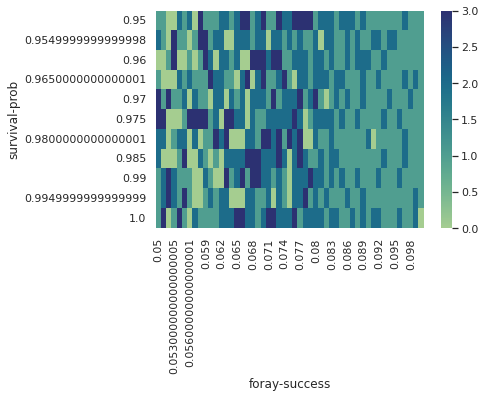

In [ ]:
sns.heatmap(param_scores, cmap='crest');